In [2]:
import torch
import openvino as ov
import cv2 as cv
from PIL import Image
import numpy as np
from ultralytics import YOLO

In [3]:
# initialize model from pt checkpoint
model = YOLO('models/best.pt')

c:\Users\user2\anaconda3\envs\legodemo\lib\site-packages\ultralytics\nn\tasks.py:781: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu


image 1/1 c:\Users\user2\Documents\legodemo\datasets\_img1.png: 480x640 1 blue, 1 orange, 266.8ms
Speed: 0.0ms preprocess, 266.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


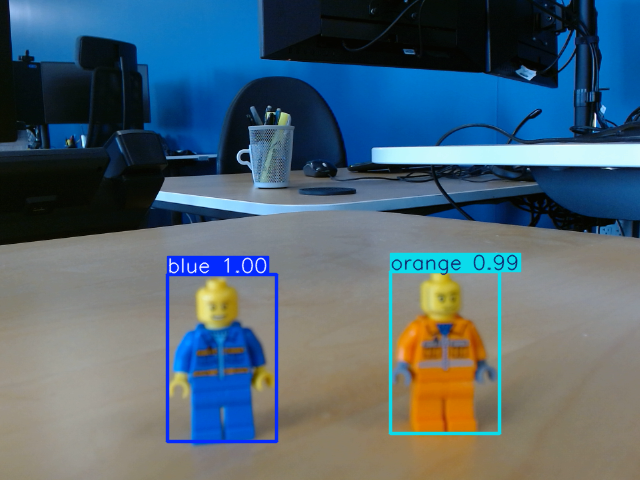

In [4]:
# test on one image
res = model('datasets/_img1.png')
Image.fromarray(res[0].plot()[:, :, ::-1])

In [9]:
#model.export(format='openvino', dynamic=True, half=True)

Ultralytics YOLOv8.2.60  Python-3.10.14 torch-2.4.0+cpu CPU (12th Gen Intel Core(TM) i5-1250PE)

PyTorch: starting from 'best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (0.0 MB)

OpenVINO: starting export with openvino 2024.3.0-16041-1e3b88e4e3f-releases/2024/3...
OpenVINO: export success  5.9s, saved as 'best_openvino_model\' (21.6 MB)

Export complete (8.2s)
Results saved to C:\Users\user2\Documents\legodemo
Predict:         yolo predict task=detect model=best_openvino_model imgsz=640 half 
Validate:        yolo val task=detect model=best_openvino_model imgsz=640 data=drive/MyDrive/legodemo/data/data.yaml half 
Visualize:       https://netron.app


'best_openvino_model'


image 1/1 c:\Users\user2\Documents\legodemo\datasets\_img1.png: 640x640 1 blue, 1 orange, 183.6ms
Speed: 0.0ms preprocess, 183.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


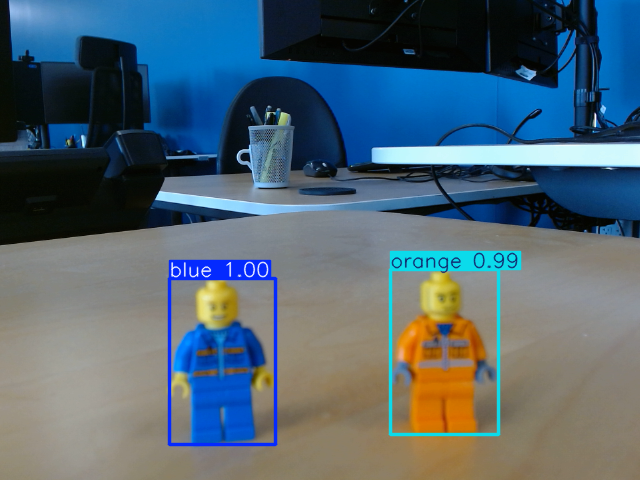

In [6]:
core = ov.Core()
ov_config = {}
ov_model = core.read_model('models/best_openvino_model/best.xml')

ov_config = {"GPU_DISABLE_WINOGRAD_CONVOLUTION": "YES"}

ov_compiled_model = core.compile_model(ov_model, 'GPU', ov_config)


def infer(*args):
    result = ov_compiled_model(args)
    return torch.from_numpy(result[0])

model.predictor.inference = infer
model.predictor.model.pt = False


res = model('datasets/_img1.png')
Image.fromarray(res[0].plot()[:, :, ::-1])

In [7]:
# quantize model to int8
import nncf

quantized_model_path = 'models/best_int8_openvino_model'


def transform_fn(data_item):
    # extracts and preprocesses input data from dataloader for quantization
    input_tensor = det_validator.preprocess(data_item)['img'].numpy()
    return input_tensor

INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, openvino
